In [385]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [386]:
import pandas as pd

In [387]:
data=pd.read_csv('/content/drive/MyDrive/proj data/steam_data.csv')

In [388]:
data.head()

,url,name,categories,img_url,user_reviews,all_reviews,date,developer,publisher,price,pegi,pegi_url
0,https://store.steampowered.com/app/945360/Among_Us/?snr=1_7_7_230_150_1,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Platform MultiplayerRemote Play on PhoneRemote Play on Tablet,https://steamcdn-a.akamaihd.net/steam/apps/945360/header.jpg?t=1598556351,"Overwhelmingly Positive(151,281)- 96% of the 151,281 user reviews in the last 30 days are positive.","Overwhelmingly Positive(224,878)- 95% of the 224,878 user reviews for this game are positive.","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-,-
1,https://store.steampowered.com/app/730/CounterStrike_Global_Offensive/?snr=1_7_7_230_150_1,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam Trading CardsSteam WorkshopIn-App PurchasesValve Anti-Cheat enabledStatsRemote Play on PhoneRemote Play on TabletRemote Play on TV,https://steamcdn-a.akamaihd.net/steam/apps/730/header.jpg?t=1592263625,"Very Positive(90,780)- 88% of the 90,780 user reviews in the last 30 days are positive.","Very Positive(4,843,904)- 87% of the 4,843,904 user reviews for this game are positive.","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to PlayPlay Game,-,-
2,https://store.steampowered.com/app/1097150/Fall_Guys_Ultimate_Knockout/?snr=1_7_7_230_150_1,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFull controller supportIn-App PurchasesRemote Play on PhoneRemote Play on Tablet,https://steamcdn-a.akamaihd.net/steam/apps/1097150/header_alt_assets_0.jpg?t=1602172542,"Very Positive(32,436)- 84% of the 32,436 user reviews in the last 30 days are positive.","Very Positive(223,706)- 80% of the 223,706 user reviews for this game are positive.","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-,-
3,https://store.steampowered.com/app/1158310/Crusader_Kings_III/?snr=1_7_7_230_150_1,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam Trading CardsSteam WorkshopSteam Cloud,https://steamcdn-a.akamaihd.net/steam/apps/1158310/header.jpg?t=1602596444,"Very Positive(5,359)- 91% of the 5,359 user reviews in the last 30 days are positive.","Very Positive(18,951)- 92% of the 18,951 user reviews for this game are positive.","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of DrugsViolence,https://steamstore-a.akamaihd.net/public/shared/images/game_ratings/ESRB/m.png
4,https://store.steampowered.com/app/1085660/Destiny_2/?snr=1_7_7_230_150_1,Destiny 2,Single-playerOnline PvPOnline Co-opSteam AchievementsFull controller supportIn-App PurchasesRemote Play on PhoneRemote Play on TabletRemote Play on TVRequires agreement to a 3rd-party EULADestiny 2 EULA,https://steamcdn-a.akamaihd.net/steam/apps/1085660/header.jpg?t=1598982557,"Very Positive(9,147)- 87% of the 9,147 user reviews in the last 30 days are positive.","Very Positive(284,689)- 86% of the 284,689 user reviews for this game are positive.","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence,https://steamstore-a.akamaihd.net/public/shared/images/game_ratings/ESRB/t.png


In [389]:
data.columns

Index(['url', 'name', 'categories', 'img_url', 'user_reviews', 'all_reviews',
       'date', 'developer', 'publisher', 'price', 'pegi', 'pegi_url'],
      dtype='object')

In [390]:
#Pan European Game Information=pegi

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81048 entries, 0 to 81047
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           81048 non-null  object
 1   name          81043 non-null  object
 2   categories    80453 non-null  object
 3   img_url       81048 non-null  object
 4   user_reviews  81048 non-null  object
 5   all_reviews   81046 non-null  object
 6   date          81046 non-null  object
 7   developer     81046 non-null  object
 8   publisher     81048 non-null  object
 9   price         81048 non-null  object
 10  pegi          76765 non-null  object
 11  pegi_url      81048 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


In [392]:
df=data[['name', 'categories', 'user_reviews', 'all_reviews',
       'date', 'developer', 'publisher', 'price', 'pegi']]

In [393]:
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi
0,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Platform MultiplayerRemote Play on PhoneRemote Play on Tablet,"Overwhelmingly Positive(151,281)- 96% of the 151,281 user reviews in the last 30 days are positive.","Overwhelmingly Positive(224,878)- 95% of the 224,878 user reviews for this game are positive.","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-
1,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam Trading CardsSteam WorkshopIn-App PurchasesValve Anti-Cheat enabledStatsRemote Play on PhoneRemote Play on TabletRemote Play on TV,"Very Positive(90,780)- 88% of the 90,780 user reviews in the last 30 days are positive.","Very Positive(4,843,904)- 87% of the 4,843,904 user reviews for this game are positive.","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to PlayPlay Game,-
2,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFull controller supportIn-App PurchasesRemote Play on PhoneRemote Play on Tablet,"Very Positive(32,436)- 84% of the 32,436 user reviews in the last 30 days are positive.","Very Positive(223,706)- 80% of the 223,706 user reviews for this game are positive.","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-
3,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam Trading CardsSteam WorkshopSteam Cloud,"Very Positive(5,359)- 91% of the 5,359 user reviews in the last 30 days are positive.","Very Positive(18,951)- 92% of the 18,951 user reviews for this game are positive.","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of DrugsViolence
4,Destiny 2,Single-playerOnline PvPOnline Co-opSteam AchievementsFull controller supportIn-App PurchasesRemote Play on PhoneRemote Play on TabletRemote Play on TVRequires agreement to a 3rd-party EULADestiny 2 EULA,"Very Positive(9,147)- 87% of the 9,147 user reviews in the last 30 days are positive.","Very Positive(284,689)- 86% of the 284,689 user reviews for this game are positive.","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence


In [394]:
df.isnull().sum()

name               5
categories       595
user_reviews       0
all_reviews        2
date               2
developer          2
publisher          0
price              0
pegi            4283
dtype: int64

In [395]:
df.loc[df['name'] == "-"]

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi
333,-,-,-,-,-,-,-,-,-
543,-,-,-,-,-,-,-,Buy Medieval Dynasty - Digital Supporter Edition-10%$33.28Add to Cart,-
589,-,-,-,-,-,-,-,Buy Metro Franchise BundleBUNDLE(?)-5%$99.71Add to Cart,-
670,-,-,-,-,-,-,-,Buy Fall Guys Collector's EditionBUNDLE(?)$29.99Add to Cart,-
831,-,-,-,-,-,-,-,Buy Freedom Fighters$14.99Add to Cart,-
...,...,...,...,...,...,...,...,...,...
81043,-,-,-,-,-,-,-,Buy Steam: Rails to Riches - All Map ExpansionsBUNDLE(?)-25%NT$ 318Add to Cart,-
81044,-,-,-,-,-,-,-,Buy Detective Hank and the Golden Sneeze - Game + Soundtrack-10%NT$ 225Add to Cart,-
81045,-,-,-,-,-,-,-,-,-
81046,-,-,-,-,-,-,-,-,-


In [396]:
df['name'] =df['name'].str.replace('-','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [397]:
for i in range(0,len(df['name'])):
  if df['name'][i]=='':
   df['name'][i]=np.nan

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [398]:
df.isnull().sum()


name            5137
categories       595
user_reviews       0
all_reviews        2
date               2
developer          2
publisher          0
price              0
pegi            4283
dtype: int64

In [399]:
df=df.dropna(subset=['name'])

In [400]:
df.isnull().sum()


name               0
categories       595
user_reviews       0
all_reviews        2
date               2
developer          2
publisher          0
price              0
pegi            4283
dtype: int64

In [401]:
df.count()

name            75911
categories      75316
user_reviews    75911
all_reviews     75909
date            75909
developer       75909
publisher       75911
price           75911
pegi            71628
dtype: int64

In [402]:
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi
0,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Platform MultiplayerRemote Play on PhoneRemote Play on Tablet,"Overwhelmingly Positive(151,281)- 96% of the 151,281 user reviews in the last 30 days are positive.","Overwhelmingly Positive(224,878)- 95% of the 224,878 user reviews for this game are positive.","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,-
1,CounterStrike: Global Offensive,Steam AchievementsFull controller supportSteam Trading CardsSteam WorkshopIn-App PurchasesValve Anti-Cheat enabledStatsRemote Play on PhoneRemote Play on TabletRemote Play on TV,"Very Positive(90,780)- 88% of the 90,780 user reviews in the last 30 days are positive.","Very Positive(4,843,904)- 87% of the 4,843,904 user reviews for this game are positive.","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to PlayPlay Game,-
2,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFull controller supportIn-App PurchasesRemote Play on PhoneRemote Play on Tablet,"Very Positive(32,436)- 84% of the 32,436 user reviews in the last 30 days are positive.","Very Positive(223,706)- 80% of the 223,706 user reviews for this game are positive.","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,-
3,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam Trading CardsSteam WorkshopSteam Cloud,"Very Positive(5,359)- 91% of the 5,359 user reviews in the last 30 days are positive.","Very Positive(18,951)- 92% of the 18,951 user reviews for this game are positive.","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,BloodLanguagePartial NuditySexual ThemesUse of DrugsViolence
4,Destiny 2,Single-playerOnline PvPOnline Co-opSteam AchievementsFull controller supportIn-App PurchasesRemote Play on PhoneRemote Play on TabletRemote Play on TVRequires agreement to a 3rd-party EULADestiny 2 EULA,"Very Positive(9,147)- 87% of the 9,147 user reviews in the last 30 days are positive.","Very Positive(284,689)- 86% of the 284,689 user reviews for this game are positive.","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,Blood Language Violence


In [403]:
df["date"].fillna("Jan 1, 0000", inplace = True)

In [404]:
df.count()

name            75911
categories      75316
user_reviews    75911
all_reviews     75909
date            75911
developer       75909
publisher       75911
price           75911
pegi            71628
dtype: int64

In [405]:
round(81043 * 0.3)

24313

In [406]:
old_data=df
#30% of 81043 is 24313 which will be enough for our analysis
df=df.sample(frac=0.3, replace=True, random_state=1)

In [407]:
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi
5420,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-
54538,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-
78448,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-
23865,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-
22155,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-


In [408]:
df.isnull().sum()


name               0
categories       176
user_reviews       0
all_reviews        1
date               0
developer          2
publisher          0
price              0
pegi            1286
dtype: int64

In [409]:
df['categories'].value_counts(20)

Single-player                                                                                                       0.069655
Single-playerProfile Features Limited                                                                               0.062796
Single-playerSteam AchievementsProfile Features Limited                                                             0.023189
Single-playerDownloadable ContentProfile Features Limited                                                           0.021817
Single-playerSteam Achievements                                                                                     0.020489
                                                                                                                      ...   
Single-playerRequires agreement to a 3rd-party EULA225020_eula                                                      0.000044
Single-playerSteam AchievementsSteam WorkshopPartial Controller SupportIncludes level editor                        0.000044


In [410]:
df["categories"].fillna("No category specified", inplace = True)


In [411]:
df.isnull().sum()


name               0
categories         0
user_reviews       0
all_reviews        1
date               0
developer          2
publisher          0
price              0
pegi            1286
dtype: int64

In [412]:
str1="Single-playerProfile Features Limited "
if "Single-player" in str1.lower():
    print("bruh")
str1.lower()

'single-playerprofile features limited '

In [416]:
df.name.count()

22773

In [418]:
index=[]
for i in range(0,df.name.count()):
    index.append(i)


In [419]:
df.index = index

In [420]:
df

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-
...,...,...,...,...,...,...,...,...,...
22768,Vision Origin,Single-player,Mixed(19)- 63% of the 19 user reviews for this game are positive.,"May 19, 2017","May 19, 2017","Shanghai ThinkingBear Network Technology Co.,Ltd",-,VR OnlyBuy VisionOriginVR$19.99Add to Cart,-
22769,城堡传说：魔王觉醒,Single-playerSteam AchievementsSteam CloudProfile Features Limited,"Mostly Positive(12)*- 75% of the 12 user reviews for this game are positive.This product has experienced one or more periods of off-topic review activity. Based on your preferences, the reviews within these periods have been excluded from this product's Review Score.","Apr 25, 2019","Apr 25, 2019",winwill工作室,-,Buy 城堡传说：魔王觉醒$11.99Add to Cart,-
22770,Sword of the Stars II: Enhanced Edition,No category specified,Mixed(588)- 43% of the 588 user reviews for this game are positive.,"Nov 30, 2012","Nov 30, 2012",Kerberos Productions,-,Buy Sword of the Stars II: Enhanced Edition$19.99Add to Cart,Fantasy ViolenceMild BloodMild LanguageMild Sexual Themes
22771,Train Simulator: DB BR 642 DMU AddOn,Single-playerDownloadable ContentSteam AchievementsFull controller supportSteam Trading CardsSteam WorkshopSteam CloudSteam Leaderboards,Positive(28)- 85% of the 28 user reviews for this game are positive.,"Aug 3, 2017","Aug 3, 2017",RSSLO,-,Buy Train Simulator: DB BR 642 DMU Add-On$19.99Add to Cart,NaN


In [421]:
pd.set_option('max_rows', 50)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [422]:
df.count

<bound method DataFrame.count of                                                              name  ...                                                                                            pegi
0                                    Corpse Party 2: Dead Patient  ...                                                                                               -
1               SENRAN KAGURA Peach Beach Splash  Hanzō Item Pack  ...                                                                                               -
2      Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack  ...                                                                                               -
3                                       FROSTBITE: Deadly Climate  ...                                                                                               -
4                            Philosophic Love－Original Soundtrack  ...                                                              

In [423]:
dat=[]
for i in range(0,len(df['categories'])):
    x=str(df['categories'][i])
    y=x.lower().replace('-','').replace(' ','')
    if(i<5):
      print(x)
      print(y)
    if "multiplayer" in y:
        dat.append('multiplayer')
        if(i<5):
          print('multi')
    elif "coop" in y:
        dat.append('multiplayer')
        if(i<5):
          print('multi3')
    elif "splitscreen" in y:
        dat.append('multiplayer')
        if(i<5):
          print('multi2')
    else:
        dat.append('singleplayer')
        if(i<5):
          print('single')





Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support
singleplayersteamachievementssteamtradingcardspartialcontrollersupport
single
Single-playerOnline PvPDownloadable ContentPartial Controller Support
singleplayeronlinepvpdownloadablecontentpartialcontrollersupport
single
Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards
single
Single-playerSteam AchievementsProfile Features Limited 
singleplayersteamachievementsprofilefeatureslimited 
single
-

single


In [424]:
test='Single-playerSteam AchievementsSteam is learning about this game smulti-player coop '
boo=False
if "multiplayer" in test.lower().replace('-',''):
        print(test)
        print('multiplayer')
        if boo:
          print('in')
elif "coop" in test:
        print(test)
        print('multiplayer2')
        if boo:
          print('in multi')
elif "splitscreen" in test :
        print('multiplayer')
        print(test)
        if boo:
          print('in multi2')
else:
        print('singleplayer')
        if boo:
          print('in single')

Single-playerSteam AchievementsSteam is learning about this game smulti-player coop 
multiplayer


In [425]:
df['is_multiplayer']=dat

In [426]:
df.head(10)

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer
5,Daylight's End VR Edition Chapter 7,Single-playerDownloadable ContentProfile Features Limited,No user reviews,"Aug 26, 2016","Aug 26, 2016",Groove Jones LLC,-,Buy Daylight's End VR Edition - Chapter 7$1.99Add to Cart,-,singleplayer
6,Orcs Must Die! Lost Adventures,Single-playerDownloadable Content,Positive(34)- 91% of the 34 user reviews for this game are positive.,"Nov 8, 2011","Nov 8, 2011",Robot Entertainment,-,Buy Orcs Must Die! - Lost Adventures $2.99Add to Cart,Blood and GoreViolence,singleplayer
7,TheGunRunner,Single-player,4 user reviews- Need more user reviews to generate a score,"Mar 16, 2018","Mar 16, 2018",ExtinctionArts,-,Buy TheGunRunner$5.99Add to Cart,-,singleplayer
8,MX vs. ATV Supercross Encore Supercross Track Pack 2,Single-playerDownloadable ContentSteam AchievementsPartial Controller SupportSteam CloudSteam Leaderboards,No user reviews,"Jan 8, 2016","Jan 8, 2016","Rainbow Studios, THQ Nordic",-,Buy MX vs. ATV Supercross Encore - Supercross Track Pack 2$9.99Add to Cart,Mild Suggestive Themes,singleplayer
9,Rocksmith® 2014 – Incubus “Drive”,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,No user reviews,"Jun 21, 2016","Jun 21, 2016",Ubisoft - San Francisco,-,Buy Rocksmith 2014 - Incubus - Drive$2.99Add to Cart,Mild Fantasy ViolenceMild LyricsMusic Downloads Not Rated by the ESRB,singleplayer


In [427]:
str1="single-playershared/splitscreenpvppartialcontrollersupportremoteplaytogetherprofilefeatureslimited "
if "online" in str1.lower().replace(' ',''):
    print("bruh")
str1.lower().replace(' ','')

'single-playershared/splitscreenpvppartialcontrollersupportremoteplaytogetherprofilefeatureslimited'

In [428]:
dat1=[]
for i in range(0,len(df['categories'])):
    x=str(df['categories'][i])
    x=x.lower().replace('-','').replace(' ','')
    
    if(i<10):
          #print(df['categories'][i])
          print(x.lower().replace(' ',''))
    if "splitscreen" in x.lower().replace(' ',''):
        dat1.append('splitscreen')
        #print("splitscreen")

    else:
        dat1.append('singlescreen')

singleplayersteamachievementssteamtradingcardspartialcontrollersupport
singleplayeronlinepvpdownloadablecontentpartialcontrollersupport
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards
singleplayersteamachievementsprofilefeatureslimited 

singleplayerdownloadablecontentprofilefeatureslimited 
singleplayerdownloadablecontent
singleplayer
singleplayerdownloadablecontentsteamachievementspartialcontrollersupportsteamcloudsteamleaderboards
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards


In [429]:
df['is_splitscreen']=dat1

In [430]:
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen


In [431]:
!pip install price-parser

In [432]:
df.loc[df['is_splitscreen'] == "splitscreen"]

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen
31,Warhammer: Chaosbane Gold Boost,Single-playerOnline PvPShared/Split Screen PvPOnline Co-opShared/Split Screen Co-opDownloadable ContentSteam AchievementsFull controller supportSteam Cloud,3 user reviews- Need more user reviews to generate a score,"May 31, 2019","May 31, 2019",Eko Software,-,Buy Warhammer Chaosbane - Gold Boost$4.99Add to Cart,Blood and GoreViolence,multiplayer,splitscreen
48,RockaBowling VR,Single-playerShared/Split Screen PvPSteam AchievementsRemote Play TogetherProfile Features Limited,No user reviews,"10 May, 2019","10 May, 2019",Reflux Interactive,-,Buy RockaBowling VRNT$ 152Add to Cart,-,multiplayer,splitscreen
63,Kamodo Steve: Janitor on Fire!,Single-playerShared/Split Screen Co-opFull controller supportRemote Play TogetherProfile Features Limited,No user reviews,"Jul 20, 2020","Jul 20, 2020","Matthew Board, SleekTiki Interactive LLC",-,Buy Kamodo Steve! Janitor on Fire!$9.99Add to Cart,-,multiplayer,splitscreen
83,"DOA6 ""Nova"" SciFi Body Suit Kokoro",Single-playerOnline PvPShared/Split Screen PvPDownloadable ContentSteam AchievementsFull controller supportIn-App PurchasesSteam CloudSteam LeaderboardsRemote Play on PhoneRemote Play on TabletRemote Play on TVRemote Play Together,No user reviews,"Jan 20, 2020","Jan 20, 2020","KOEI TECMO GAMES CO., LTD.",-,"Buy DOA6 ""Nova"" Sci-Fi Body Suit - Kokoro$2.99Add to Cart",BloodLanguageSexual ThemesViolenceInteractive ElementsIn-Game PurchasesUsers Interact,multiplayer,splitscreen
84,FSX SpacePort,Single-playerOnline PvPShared/Split Screen PvPRemote Play TogetherSteam is learning about this game Requires agreement to a 3rd-party EULAFSX SpacePort EULA,No user reviews,TerraBuilder,-,TerraBuilder,-,-,-,multiplayer,splitscreen
...,...,...,...,...,...,...,...,...,...,...,...
22679,XPlane 11 Addon: Aerosoft Paderborn XP,Single-playerShared/Split Screen PvPDownloadable ContentPartial Controller SupportIncludes level editor,1 user reviews- Need more user reviews to generate a score,"Jul 11, 2019","Jul 11, 2019",Stairport Sceneries,-,Buy X-Plane 11 - Add-on: Aerosoft - Paderborn XP$19.99Add to Cart,-,multiplayer,splitscreen
22705,Law Mower,Single-playerOnline PvPShared/Split Screen PvPOnline Co-opShared/Split Screen Co-opSteam AchievementsPartial Controller SupportIncludes level editorRemote Play Together,1 user reviews- Need more user reviews to generate a score,"10 Aug, 2017","10 Aug, 2017",Scoria Studios,-,Buy Law MowerNT$ 278Add to Cart,-,multiplayer,splitscreen
22721,Mage Mania,Shared/Split Screen PvPFull controller supportRemote Play TogetherProfile Features Limited Requires agreement to a 3rd-party EULAMage Mania EULA,Positive(12)- 91% of the 12 user reviews for this game are positive.,"Dec 13, 2019","Dec 13, 2019",CappudinoStudio,-,Play Mage ManiaFree To PlayPlay Game,-,multiplayer,splitscreen
22764,KnightRoyale,Shared/Split Screen PvPRemote Play TogetherProfile Features Limited,7 user reviews- Need more user reviews to generate a score,"Mar 15, 2020","Mar 15, 2020",abdulkadir,-,Buy KnightRoyaleSPECIAL PROMOTION! Offer ends October 29-51%$0.99$0.49Add to Cart,-,multiplayer,splitscreen


In [433]:
dat2=[]
for i in range(0,len(df['categories'])):
    x=str(df['categories'][i])
    if(i<10):
          #print(df['categories'][i])
          print(x.lower().replace(' ','').replace('-',''))
    if "online" in x.lower().replace(' ','').replace('-',''):
        dat2.append('online')
    else:
        dat2.append('offline')

singleplayersteamachievementssteamtradingcardspartialcontrollersupport
singleplayeronlinepvpdownloadablecontentpartialcontrollersupport
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards
singleplayersteamachievementsprofilefeatureslimited 

singleplayerdownloadablecontentprofilefeatureslimited 
singleplayerdownloadablecontent
singleplayer
singleplayerdownloadablecontentsteamachievementspartialcontrollersupportsteamcloudsteamleaderboards
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards


In [434]:
df['is_online']=dat2

In [435]:
df.tail()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online
22768,Vision Origin,Single-player,Mixed(19)- 63% of the 19 user reviews for this game are positive.,"May 19, 2017","May 19, 2017","Shanghai ThinkingBear Network Technology Co.,Ltd",-,VR OnlyBuy VisionOriginVR$19.99Add to Cart,-,singleplayer,singlescreen,offline
22769,城堡传说：魔王觉醒,Single-playerSteam AchievementsSteam CloudProfile Features Limited,"Mostly Positive(12)*- 75% of the 12 user reviews for this game are positive.This product has experienced one or more periods of off-topic review activity. Based on your preferences, the reviews within these periods have been excluded from this product's Review Score.","Apr 25, 2019","Apr 25, 2019",winwill工作室,-,Buy 城堡传说：魔王觉醒$11.99Add to Cart,-,singleplayer,singlescreen,offline
22770,Sword of the Stars II: Enhanced Edition,No category specified,Mixed(588)- 43% of the 588 user reviews for this game are positive.,"Nov 30, 2012","Nov 30, 2012",Kerberos Productions,-,Buy Sword of the Stars II: Enhanced Edition$19.99Add to Cart,Fantasy ViolenceMild BloodMild LanguageMild Sexual Themes,singleplayer,singlescreen,offline
22771,Train Simulator: DB BR 642 DMU AddOn,Single-playerDownloadable ContentSteam AchievementsFull controller supportSteam Trading CardsSteam WorkshopSteam CloudSteam Leaderboards,Positive(28)- 85% of the 28 user reviews for this game are positive.,"Aug 3, 2017","Aug 3, 2017",RSSLO,-,Buy Train Simulator: DB BR 642 DMU Add-On$19.99Add to Cart,NaN,singleplayer,singlescreen,offline
22772,Metro Exodus,Single-playerSteam AchievementsFull controller supportSteam Trading CardsSteam CloudRemote Play on PhoneRemote Play on TabletRemote Play on TVRequires agreement to a 3rd-party EULAMetro Exodus EULA,"Very Positive(2,615)- 85% of the 2,615 user reviews in the last 30 days are positive.","Very Positive(27,784)- 85% of the 27,784 user reviews for this game are positive.","Feb 14, 2019",4A Games,Deep Silver,Buy Metro Exodus$39.99Add to Cart,"Blood and Gore, Intense Violence, Partial Nudity, Sexual Themes, Strong Language, Use of Drugs",singleplayer,singlescreen,offline


In [436]:
df.loc[df['is_online'] == "online"]


,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online
23,Monstrous,Single-playerOnline PvPOnline Co-opSteam AchievementsFull controller support,6 user reviews- Need more user reviews to generate a score,"16 May, 2018","16 May, 2018",Red Disk Games,-,Buy MonstrousNT$ 268Add to Cart,-,multiplayer,singlescreen,online
29,GRID Edition Aston Martin Vantage GT4 (+ XP Boost),Single-playerOnline PvPDownloadable ContentFull controller support,3 user reviews- Need more user reviews to generate a score,"6 Dec, 2019","6 Dec, 2019",Codemasters,-,Buy GRID DLC - Aston MartinNT$ 45Add to Cart,NaN,singleplayer,singlescreen,online
31,Warhammer: Chaosbane Gold Boost,Single-playerOnline PvPShared/Split Screen PvPOnline Co-opShared/Split Screen Co-opDownloadable ContentSteam AchievementsFull controller supportSteam Cloud,3 user reviews- Need more user reviews to generate a score,"May 31, 2019","May 31, 2019",Eko Software,-,Buy Warhammer Chaosbane - Gold Boost$4.99Add to Cart,Blood and GoreViolence,multiplayer,splitscreen,online
33,Underfire,Single-playerOnline PvPProfile Features Limited,8 user reviews- Need more user reviews to generate a score,"Jul 19, 2020","Jul 19, 2020","Beribo Games, Rakarnov",-,Buy Underfire$1.99Add to Cart,-,singleplayer,singlescreen,online
...,...,...,...,...,...,...,...,...,...,...,...,...
22712,BattleSky VR,Single-playerOnline PvP,Positive(21)- 85% of the 21 user reviews for this game are positive.,"Jan 19, 2018","Jan 19, 2018",Oh!WHATif Inc.,-,VR OnlyBuy BattleSky VR$12.99Add to Cart,-,singleplayer,singlescreen,online
22731,Outbreak Rainbow Flashlight and Laser,Single-playerOnline PvPOnline Co-opDownloadable ContentSteam AchievementsFull controller supportSteam Trading CardsStatsProfile Features Limited,No user reviews,"Feb 3, 2017","Feb 3, 2017",Dead Drop Studios LLC,-,Buy Outbreak - Rainbow Flashlight and Laser$0.99Add to Cart,ViolenceBlood,multiplayer,singlescreen,online
22743,Heroes & Generals GE Soldier Pack: Light Tanker,MMOOnline PvPOnline Co-opDownloadable ContentIn-App Purchases,1 user reviews- Need more user reviews to generate a score,"May 29, 2020","May 29, 2020",RETO MOTO,-,Buy Heroes & Generals - GE Light Tanker$19.99Add to CartThis product is not eligible for refund. Learn more,-,multiplayer,singlescreen,online
22755,theHunter: Call of the Wild™ Parque Fernando,Single-playerOnline Co-opDownloadable ContentSteam AchievementsFull controller supportSteam Cloud,Mostly Positive(210)- 71% of the 210 user reviews for this game are positive.,"Dec 13, 2018","Dec 13, 2018",Expansive Worlds,-,Buy theHunter: Call of the Wild™ - Parque Fernando$7.99Add to Cart,"Mild Blood, Violence",multiplayer,singlescreen,online


In [437]:
from price_parser import Price
price = 'Buy Train Simulator: DB BR474.3 EMU Add-On$12.99Add to Cart'
expr = 'Price is: \$([0-9,]*\.[0-9]*)'


In [438]:
import re
price_dat=[]
currency=[]
for i in range(0,len(df['categories'])):
    x=str(df['price'][i])
    x2 = re.findall(r"\$[^\]]+", x)
    x2 = ''.join([str(item)for item in x2])
    price_dat.append(x2)



   
      


In [439]:
df['clean_price']=price_dat

In [440]:
type(df['clean_price'][0])

str

In [441]:
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen,offline,$6.99Add to Cart


In [442]:
ac='$49.99Add to CartThis product is not eligible for refund. Learn more'
new_string = re.sub("[a-zA-Z]+", "", ac)
print(new_string)
#str_list=new_string.replace(' ','').split('.')
str_list=new_string.replace('$','').replace(' ','').split('.')

str_list = list(filter(None, str_list))
str_list

$49.99        .  


['49', '99']

In [443]:
import re
price_dat=[]

for i in range(0,len(df['categories'])):
    x=str(df['clean_price'][i])
    x2 = re.sub("[a-zA-Z]+", "", x)
    str_list=x2.replace('$','').replace(' ','').split('.')
    str_list = list(filter(None, str_list))
    price_dat.append(str_list)


   
    

In [444]:
df['price_cleaned']=price_dat

In [445]:
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart,"[9, 99]"
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart,[378]
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart,[152]
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,,[]
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen,offline,$6.99Add to Cart,"[6, 99]"


In [446]:
price_dat=[]
for i in range(0,len(df['categories'])):
    x=df['price_cleaned'][i]
    x2 = x
    #print(x2)
    if len(x2)==2:
      x3=x2[0]+'.'+x2[1]
    elif len(x2)==0:
      x3='0.00'
    else:
      x3=a+'.00'
    price_dat.append(x3)
    
    
      

In [447]:
x2=['49', '99']
x3=x2[0]+'.'+x2[1]
print(x3)

49.99


In [448]:
df['final_clean_price']=price_dat
df.head()


,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart,"[9, 99]",9.99
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart,[378],9.00
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart,[152],9.00
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,,[],0.00
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen,offline,$6.99Add to Cart,"[6, 99]",6.99


In [449]:
dat1=[]
for i in range(0,len(df['categories'])):
    x=str(df['categories'][i])
    if(i<10):
          #print(df['categories'][i])
          print(x.lower().replace(' ','').replace('-',''))
    if "controllersupport" in x.lower().replace(' ','').replace('-',''):
        dat1.append('yes')

    else:
        dat1.append('no')

singleplayersteamachievementssteamtradingcardspartialcontrollersupport
singleplayeronlinepvpdownloadablecontentpartialcontrollersupport
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards
singleplayersteamachievementsprofilefeatureslimited 

singleplayerdownloadablecontentprofilefeatureslimited 
singleplayerdownloadablecontent
singleplayer
singleplayerdownloadablecontentsteamachievementspartialcontrollersupportsteamcloudsteamleaderboards
singleplayerdownloadablecontentsteamachievementssteamtradingcardspartialcontrollersupportsteamcloudsteamleaderboards


In [450]:
df['controller_support']=dat1
df.head()

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart,"[9, 99]",9.99,yes
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart,[378],9.00,yes
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart,[152],9.00,yes
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,,[],0.00,no
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen,offline,$6.99Add to Cart,"[6, 99]",6.99,no


In [467]:
df.loc[df['final_clean_price']=='50)49.99']

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support
10499,ZeroK Gold Donation ($50),Single-playerOnline PvPOnline Co-opCross-Platform MultiplayerDownloadable ContentProfile Features Limited,1 user reviews- Need more user reviews to generate a score,"Apr 27, 2018","Apr 27, 2018",Zero-K Team,-,Buy Zero-K - Gold Donation ($50)$49.99Add to CartThis product is not eligible for refund. Learn more,-,multiplayer,singlescreen,online,$50)$49.99Add to CartThis product is not eligible for refund. Learn more,"[50)49, 99]",50)49.99,no


In [459]:
df.loc[df['final_clean_price']== '50)49.99']


,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support
10499,ZeroK Gold Donation ($50),Single-playerOnline PvPOnline Co-opCross-Platform MultiplayerDownloadable ContentProfile Features Limited,1 user reviews- Need more user reviews to generate a score,"Apr 27, 2018","Apr 27, 2018",Zero-K Team,-,Buy Zero-K - Gold Donation ($50)$49.99Add to CartThis product is not eligible for refund. Learn more,-,multiplayer,singlescreen,online,$50)$49.99Add to CartThis product is not eligible for refund. Learn more,"[50)49, 99]",50)49.99,no


In [454]:
df['final_clean_price'] = df['final_clean_price'].str.replace(',','')

In [469]:
#df['final_clean_price'][10499] = float(df['final_clean_price'][10499])

In [472]:
for i in range(0,df.name.count()):
  try:
    df['final_clean_price'][i] = float(df['final_clean_price'][i])
  except:
    df=df.drop(index=i,axis=1)


In [474]:
df['final_clean_price'] = df['final_clean_price'].astype(float)

In [ ]:
for i in range(0,df.name.count()):
  try:
      if(df['final_clean_price'][3]>0.00):
        print('No')
      else:
        print('Yes')
  except:
      pass

In [529]:
for i in range(0,df.name.count()):
  try:
    b=df['final_clean_price'][i]
    if(b>=0.01):
        df['is_free'][i]='No'
    else:
        df['is_free'][i]='Yes'
  except:
      pass




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [531]:
df[['final_clean_price','is_free']].head()

,final_clean_price,is_free
0,9.99,No
1,9.00,No
2,9.00,No
3,0.00,Yes
4,6.99,No


In [573]:
df.user_reviews.value_counts()

No user reviews                                                                      6045
1 user reviews- Need more user reviews to generate a score                           1986
2 user reviews- Need more user reviews to generate a score                           1214
3 user reviews- Need more user reviews to generate a score                            844
4 user reviews- Need more user reviews to generate a score                            649
                                                                                     ... 
Mostly Positive(60)- 73% of the 60 user reviews for this game are positive.             1
Very Positive(57)- 82% of the 57 user reviews in the last 30 days are positive.         1
Mixed(243)- 51% of the 243 user reviews for this game are positive.                     1
Very Positive(298)- 90% of the 298 user reviews in the last 30 days are positive.       1
Very Positive(50)- 90% of the 50 user reviews for this game are positive.               1
Name: user

In [594]:
df['clean_user_reviews']=df['user_reviews'].str.lower()
df['clean_user_reviews']=df['clean_user_reviews'].str.replace(' ','')

In [596]:
df.clean_user_reviews.value_counts()


nouserreviews                                                                  6045
1userreviews-needmoreuserreviewstogenerateascore                               1986
2userreviews-needmoreuserreviewstogenerateascore                               1214
3userreviews-needmoreuserreviewstogenerateascore                                844
4userreviews-needmoreuserreviewstogenerateascore                                649
                                                                               ... 
mixed(24)-62%ofthe24userreviewsforthisvideoarepositive.                           1
mostlypositive(14,202)-79%ofthe14,202userreviewsinthelast30daysarepositive.       1
mostlypositive(796)-70%ofthe796userreviewsforthisgamearepositive.                 1
verypositive(939)-90%ofthe939userreviewsforthisgamearepositive.                   1
verypositive(99)-90%ofthe99userreviewsforthisgamearepositive.                     1
Name: clean_user_reviews, Length: 4358, dtype: int64

In [665]:
s='Very Positive(180)- 82% of the 180 user reviews for this game are positive.'.lower()
res = s.partition('-')[0]
#s.split("Positive(",1)[1] 
res

'very positive(180)'

In [600]:
df.name.count()

22772

In [603]:
for i in range(0,df.name.count()):
  try:
    s=df['clean_user_reviews'][i]
    res = s.partition('-')[0]
    df['clean_user_reviews'][i]=res
  except:
    pass
df.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support,is_free,clean_user_reviews
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart,"[9, 99]",9.99,yes,No,verypositive(180)
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart,[378],9.00,yes,No,1userreviews
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart,[152],9.00,yes,No,2userreviews
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,,[],0.00,no,Yes,verypositive(435)
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen,offline,$6.99Add to Cart,"[6, 99]",6.99,no,No,positive(15)


In [623]:
listx=['(',')',',','*']
for i in range(0,10):
  listx.append(''+str(i))
print(listx)
for i in listx:
  df['clean_user_reviews']=df['clean_user_reviews'].str.replace(i,'')

['(', ')', ',', '*', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [624]:
df['clean_user_reviews']

0                                                   verypositive
1                                                    userreviews
2                                                    userreviews
3                                                   verypositive
4                                                       positive
                                  ...                           
22768                                                      mixed
22769                                             mostlypositive
22770                                                      mixed
22771                                                   positive
22772    verypositive-%oftheuserreviewsinthelastdaysarepositive.
Name: clean_user_reviews, Length: 22772, dtype: object

In [639]:
df['clean_user_reviews']=df['clean_user_reviews'].str.replace('userreviews','mixed')
df['clean_user_reviews']=df['clean_user_reviews'].str.replace('verypositive-%ofthemixedinthelastdaysarepositive.','verypositive')
df['clean_user_reviews']=df['clean_user_reviews'].str.replace('nomixed','no reviews')


In [640]:
df.clean_user_reviews.unique()

array(['verypositive', 'mixed', 'positive', 'no reviews',
       'mostlypositive', 'mostlynegative', 'verynegative',
       'overwhelminglypositive', 'negative', 'overwhelminglynegative'],
      dtype=object)

In [660]:
allrevs=['verypositive', 'mixed', 'positive', 'no reviews',
       'mostlypositive', 'mostlynegative', 'verynegative',
       'overwhelminglypositive', 'negative', 'overwhelminglynegative']
positive_rev=['verypositive', 'positive',
       'mostlypositive', 
       'overwhelminglypositive']
mixed=['mixed']
negative=allrevs
for i in positive_rev:
  negative.remove(i)

for i in mixed:
  negative.remove(i)
negative.remove('no reviews')
print(negative)


['mostlynegative', 'verynegative', 'negative', 'overwhelminglynegative']


In [662]:
rev2=[]
for i in range(0,df.name.count()):
  try:
    if(df['clean_user_reviews'][i] in positive_rev):
      rev2.append('positive')
    elif (df['clean_user_reviews'][i] in negative):
      rev2.append('negative')
    elif (df['clean_user_reviews'][i] =='no reviews'):
      rev2.append('no reviews')
    else:
      rev2.append('mixed')

  except:
    rev2.append('no reviews')
    pass
df['3_category_review']=rev2
df.head(5)


,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support,is_free,clean_user_reviews,3_category_review
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart,"[9, 99]",9.99,yes,No,verypositive,positive
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart,[378],9.00,yes,No,mixed,mixed
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart,[152],9.00,yes,No,mixed,mixed
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,,[],0.00,no,Yes,verypositive,positive
4,Philosophic Love－Original Soundtrack,-,Positive(15)- 93% of the 15 user reviews for this game are positive.,"Aug 17, 2018","Aug 17, 2018","IWPLAY WORLD INTERACTIVE ENTERTAINMENT TECHNOLOGY CO., LTD.",-,Buy 東周列萌志Philosophic Love－原創配樂集Original Soundtrack$6.99Add to Cart,-,singleplayer,singlescreen,offline,$6.99Add to Cart,"[6, 99]",6.99,no,No,positive,positive


# EDA

In [687]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [688]:
plt.rcParams['figure.figsize']=(25,10)

In [689]:
df.head(4)

,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support,is_free,clean_user_reviews,3_category_review
0,Corpse Party 2: Dead Patient,Single-playerSteam AchievementsSteam Trading CardsPartial Controller Support,Very Positive(180)- 82% of the 180 user reviews for this game are positive.,"Oct 23, 2019","Oct 23, 2019",GrisGris,-,Buy Corpse Party 2: Dead Patient$9.99Add to Cart,-,singleplayer,singlescreen,offline,$9.99Add to Cart,"[9, 99]",9.99,yes,No,verypositive,positive
1,SENRAN KAGURA Peach Beach Splash Hanzō Item Pack,Single-playerOnline PvPDownloadable ContentPartial Controller Support,1 user reviews- Need more user reviews to generate a score,"7 Mar, 2018","7 Mar, 2018",Tamsoft,-,Buy SENRAN KAGURA Peach Beach Splash - Hanzō Item PackNT$ 378Add to Cart,-,singleplayer,singlescreen,online,$ 378Add to Cart,[378],9.00,yes,No,mixed,mixed
2,Rocksmith® 2014 Edition – Remastered – Metal Mix Song Pack,Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsPartial Controller SupportSteam CloudSteam Leaderboards,2 user reviews- Need more user reviews to generate a score,"22 May, 2018","22 May, 2018",Ubisoft - San Francisco,-,Buy Rocksmith® 2014 Edition – Remastered – Metal Mix Song PackNT$ 152Add to Cart,-,singleplayer,singlescreen,offline,$ 152Add to Cart,[152],9.00,yes,No,mixed,mixed
3,FROSTBITE: Deadly Climate,Single-playerSteam AchievementsProfile Features Limited,Very Positive(435)- 87% of the 435 user reviews for this game are positive.,"Nov 19, 2017","Nov 19, 2017",Alex Olinkiewicz,-,Play FROSTBITE: Deadly ClimateFreePlay Game,-,singleplayer,singlescreen,offline,,[],0.00,no,Yes,verypositive,positive


In [690]:
df.is_multiplayer.unique()
df.is_splitscreen.unique()


array(['singlescreen', 'splitscreen'], dtype=object)

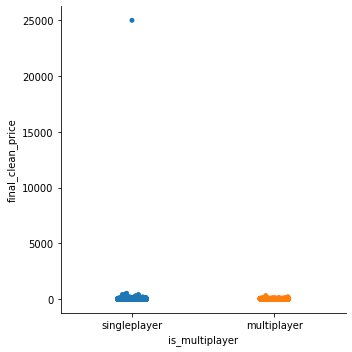

In [691]:
sns.catplot(x="is_multiplayer", y="final_clean_price", data=df)

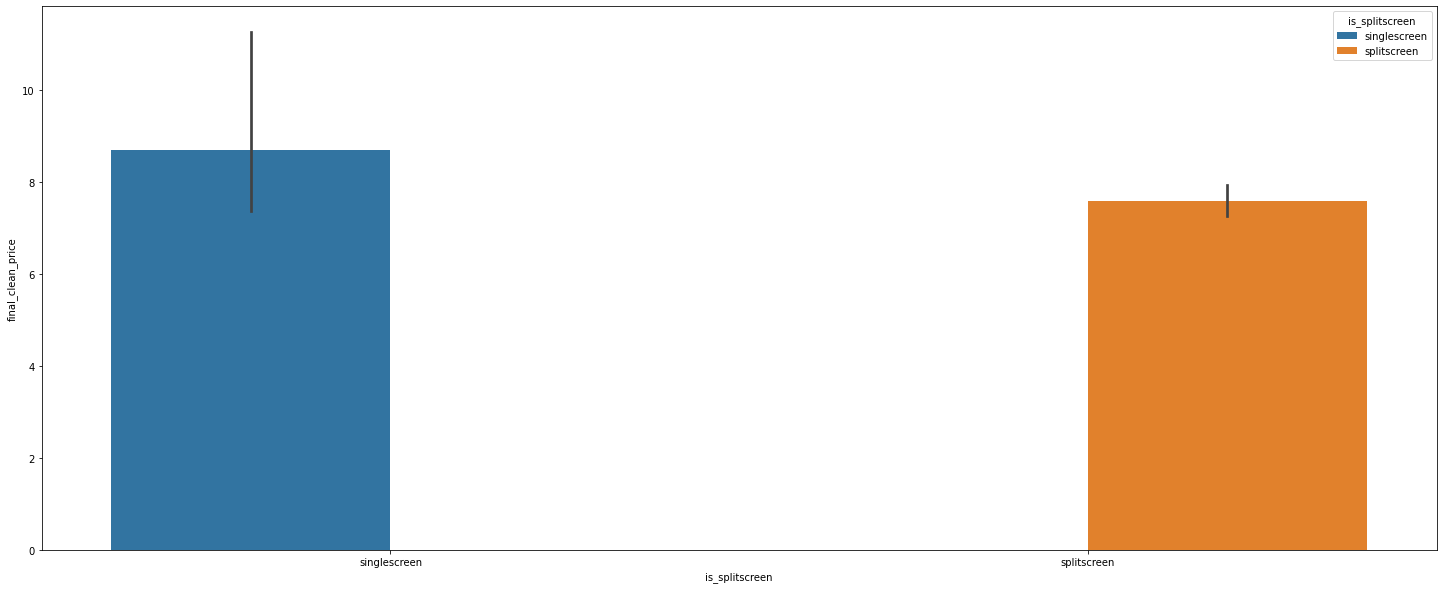

In [692]:
sns.barplot(x="is_splitscreen", y="final_clean_price", hue = 'is_splitscreen', data=df)

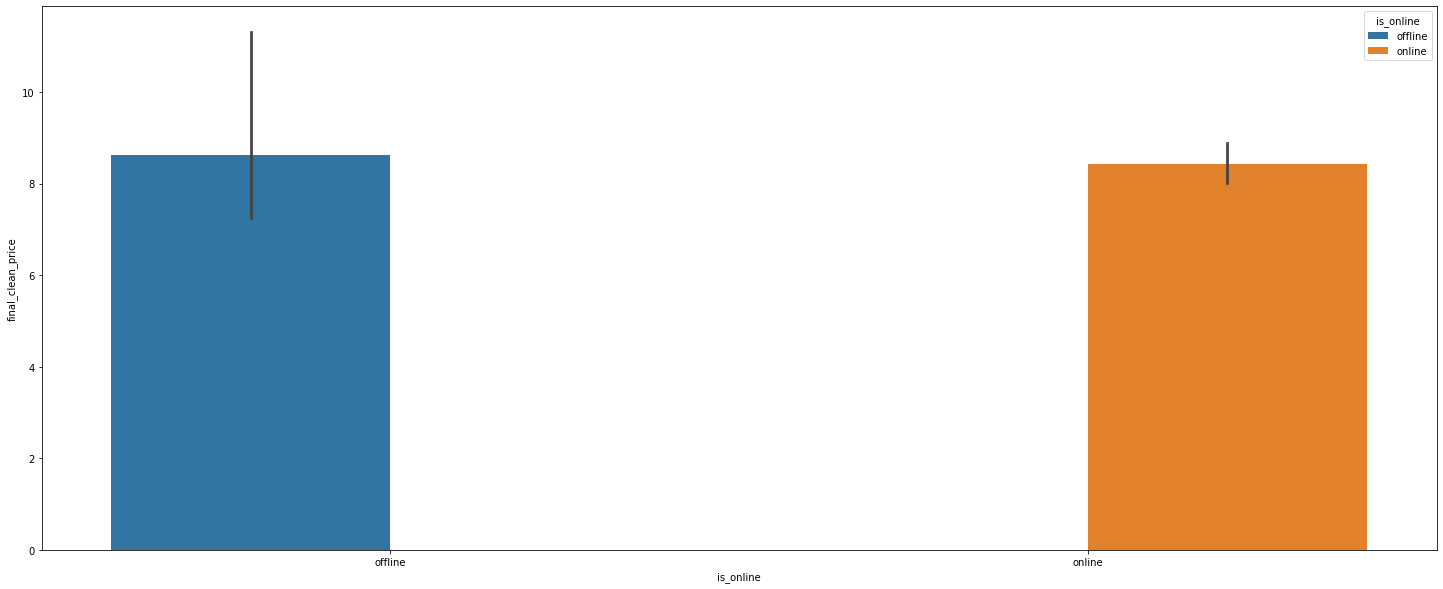

In [693]:
sns.barplot(x="is_online", y="final_clean_price", hue = 'is_online', data=df)

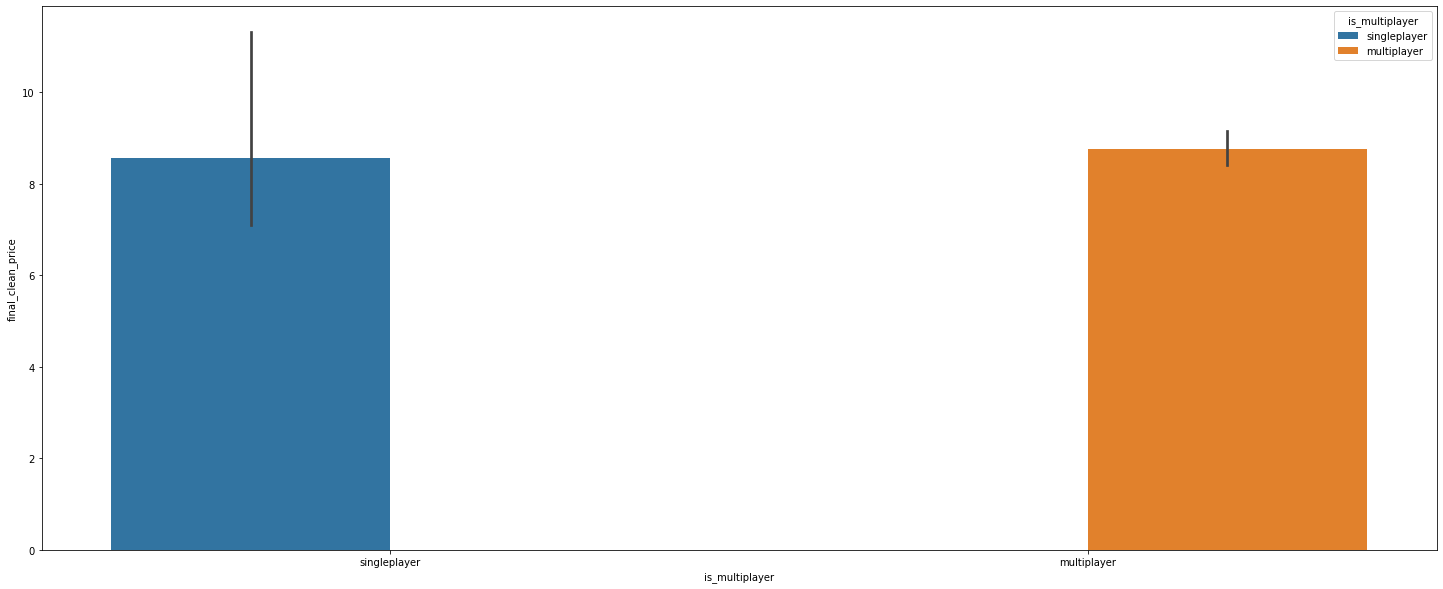

In [694]:
sns.barplot(x="is_multiplayer", y="final_clean_price", hue = 'is_multiplayer', data=df)


In [695]:
df.isnull().sum()


name                     0
categories               0
user_reviews             0
all_reviews              1
date                     0
developer                2
publisher                0
price                    0
pegi                  1286
is_multiplayer           0
is_splitscreen           0
is_online                0
clean_price              0
price_cleaned            0
final_clean_price        0
controller_support       0
is_free                  0
clean_user_reviews       0
3_category_review        0
dtype: int64

In [696]:
#checking highest priced games
pricesort=df.sort_values(by=['final_clean_price'],ascending=False)
pricesort.head(5)


,name,categories,user_reviews,all_reviews,date,developer,publisher,price,pegi,is_multiplayer,is_splitscreen,is_online,clean_price,price_cleaned,final_clean_price,controller_support,is_free,clean_user_reviews,3_category_review
4378,"Creature Clicker $2,500 Ingame Credits",Single-playerDownloadable ContentSteam AchievementsSteam Trading CardsProfile Features Limited,No user reviews,"May 10, 2020","May 10, 2020",ColloseusX,-,"Buy Creature Clicker - $2,500 Ingame Credits$0.99Add to CartThis product is not eligible for refund. Learn more",-,singleplayer,singlescreen,offline,"$2,500 Ingame Credits$0.99Add to CartThis product is not eligible for refund. Learn more","[2,5000, 99]",25000.99,no,No,no reviews,no reviews
4034,CUR3D Steam Edition Permission for commercial use,Downloadable ContentProfile Features Limited Requires agreement to a 3rd-party EULACUR3D Maker Edition - Permission for commercial use EULA,1 user reviews- Need more user reviews to generate a score,"Nov 6, 2017","Nov 6, 2017",RUHRSOURCE GmbH,-,Buy CUR3D Steam Edition - Permission for commercial use$499.99Add to Cart,-,singleplayer,singlescreen,offline,$499.99Add to Cart,"[499, 99]",499.99,no,No,mixed,mixed
5062,CUR3D Steam Edition Permission for commercial use,Downloadable ContentProfile Features Limited Requires agreement to a 3rd-party EULACUR3D Maker Edition - Permission for commercial use EULA,1 user reviews- Need more user reviews to generate a score,"Nov 6, 2017","Nov 6, 2017",RUHRSOURCE GmbH,-,Buy CUR3D Steam Edition - Permission for commercial use$499.99Add to Cart,-,singleplayer,singlescreen,offline,$499.99Add to Cart,"[499, 99]",499.99,no,No,mixed,mixed
7245,flyingshapes° Professional 1 Month Special,Downloadable ContentProfile Features Limited Incorporates 3rd-party DRM: flyingshapes GmbH1 concurrent user machine activation limit,No user reviews,"Dec 12, 2019","Dec 12, 2019",flyingshapes GmbH,-,Buy flyingshapes° Professional 1 Year Special$399.00Add to Cart,-,singleplayer,singlescreen,offline,$399.00Add to Cart,"[399, 00]",399.00,no,No,no reviews,no reviews
8499,flyingshapes° Professional 1 Month Special,Downloadable ContentProfile Features Limited Incorporates 3rd-party DRM: flyingshapes GmbH1 concurrent user machine activation limit,No user reviews,"Dec 12, 2019","Dec 12, 2019",flyingshapes GmbH,-,Buy flyingshapes° Professional 1 Year Special$399.00Add to Cart,-,singleplayer,singlescreen,offline,$399.00Add to Cart,"[399, 00]",399.00,no,No,no reviews,no reviews


In [697]:
#top 10 highest priced games on steam
pricesort[['name','developer','final_clean_price']].head(10)

,name,developer,final_clean_price
4378,"Creature Clicker $2,500 Ingame Credits",ColloseusX,25000.99
4034,CUR3D Steam Edition Permission for commercial use,RUHRSOURCE GmbH,499.99
5062,CUR3D Steam Edition Permission for commercial use,RUHRSOURCE GmbH,499.99
7245,flyingshapes° Professional 1 Month Special,flyingshapes GmbH,399.00
8499,flyingshapes° Professional 1 Month Special,flyingshapes GmbH,399.00
12020,flyingshapes° Professional 1 Month Special,flyingshapes GmbH,399.00
10589,Clickteam Fusion 2.5 Developer Upgrade,Clickteam,299.99
15936,Facerig Studio for Individual Creators,Holotech Studios,299.99
3482,Sharecare YOU Pro,Sharecare Reality Lab,269.99
12053,GlassWire Elite,SecureMix LLC,199.99


In [698]:
pricewithoutzero=df[df.final_clean_price > 0]

In [699]:
pricewithoutzero=pricewithoutzero.sort_values(by=['final_clean_price'],ascending=True)

In [700]:
#top 10 lowest priced games on steam
pricewithoutzero[['name','developer','final_clean_price']].head(10)

,name,developer,final_clean_price
19460,Super Hipster Lumberjack,Noah Williams,0.50
13012,PAYDAY 2: Gage Shotgun Pack,OVERKILL - a Starbreeze Studio.,0.89
19728,Seraphic Destroyer,Sonic-Alpha,0.90
21865,Deadly Stigma,Black Dragon Studio,0.98
6948,Tank raid,ARGames,0.99
1769,Golden Saki Pigtails,TAMSOFT,0.99
1766,Euro Truck Simulator 2 Hungarian Paint Jobs Pack,SCS Software,0.99
6958,Taboos: Cracks,DSGame,0.99
6960,RGB RUN,Pickle Drugs,0.99
6971,American Angst (Steam Deluxe Edition),M3G1DD0,0.99


In [701]:
df.is_free.value_counts()

No     18121
Yes     4651
Name: is_free, dtype: int64

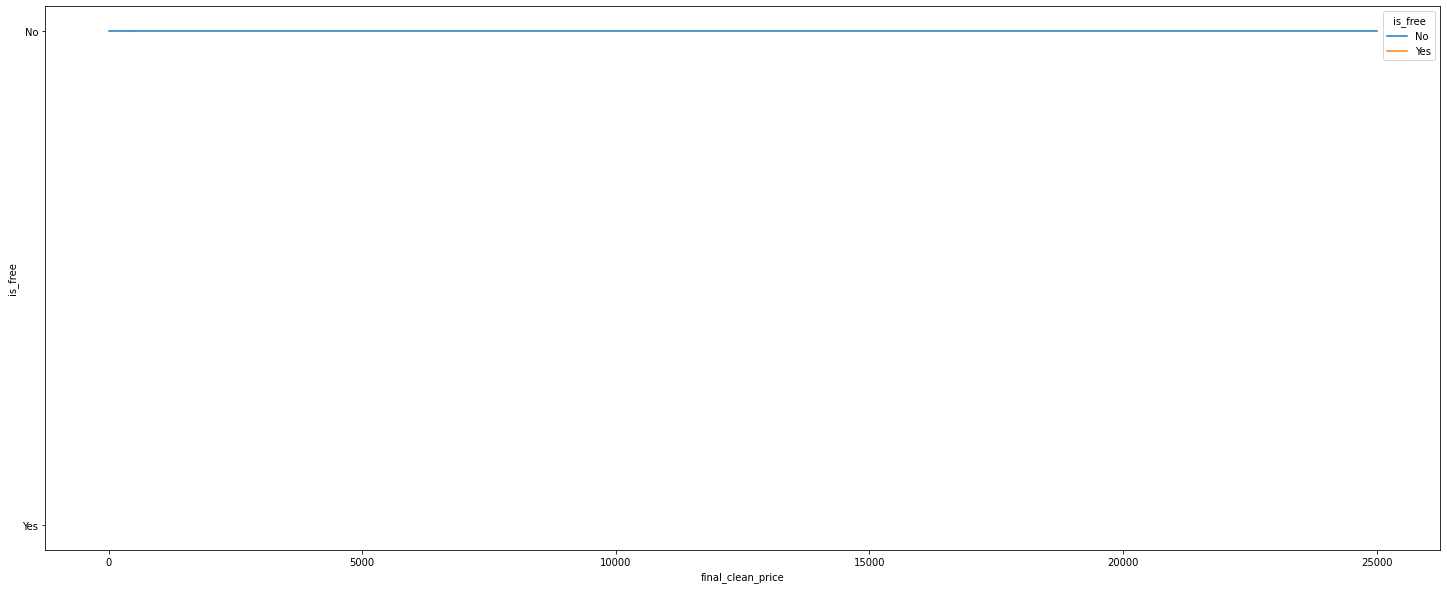

In [702]:
sns.lineplot(x="final_clean_price", y="is_free", hue = 'is_free', data=df)


In [707]:
df.publisher.unique()

array(['-', 'Bitbox Ltd.', 'CM Games', 'Xbox Game Studios', 'Capcom',
       'Keen Software House', 'Daedalic Entertainment', 'Kasedo Games',
       'Computer Lunch', 'Electronic Arts', 'Klei Entertainment',
       'BitMonster, Inc.', 'Alex Carpenter', "Mi'pu'mi Games GmbH",
       'Sony Pictures Virtual Reality', 'SFB Games', 'Cheese Games',
       'Paradox Interactive', 'New Game order', 'IndieGala',
       'Spookulele Games', 'Bethesda Softworks', 'Square Enix',
       'Arkane Studios', 'Hitcents', 'Stardock Entertainment',
       'Deep Silver', 'MangaGamer', 'Giant Army', 'Team17 Digital Ltd',
       'Konami Digital Entertainment', 'XSEED Games', 'MY.GAMES',
       'PixelFade Inc', 'SureAI', 'HandyGames', 'Strange_Indie_Team',
       'Valve', 'Rockstar Games', 'Subset Games', 'Kalypso Media',
       'NukGames', 'Presentable Games',
       'GungHo Online Entertainment America', 'Gearbox Publishing',
       'EpicScapes', 'Andy Sztark', 'ANPA.US', 'Grip Digital',
       'WayForward', 

In [704]:
df.clean_user_reviews.value_counts()


mixed                     9468
no reviews                6045
verypositive              2730
positive                  2210
mostlypositive            1717
mostlynegative             409
overwhelminglypositive     110
negative                    64
verynegative                18
overwhelminglynegative       1
Name: clean_user_reviews, dtype: int64

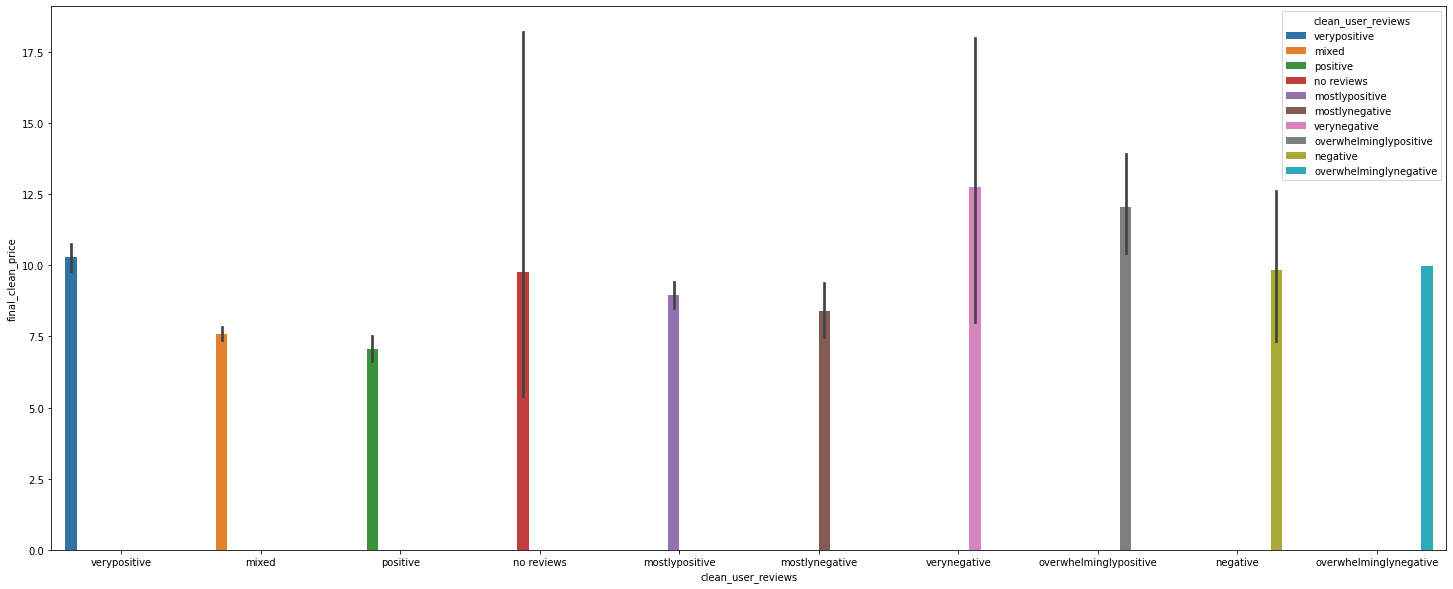

In [705]:
sns.barplot(y="final_clean_price", x="clean_user_reviews", hue = 'clean_user_reviews', data=df)


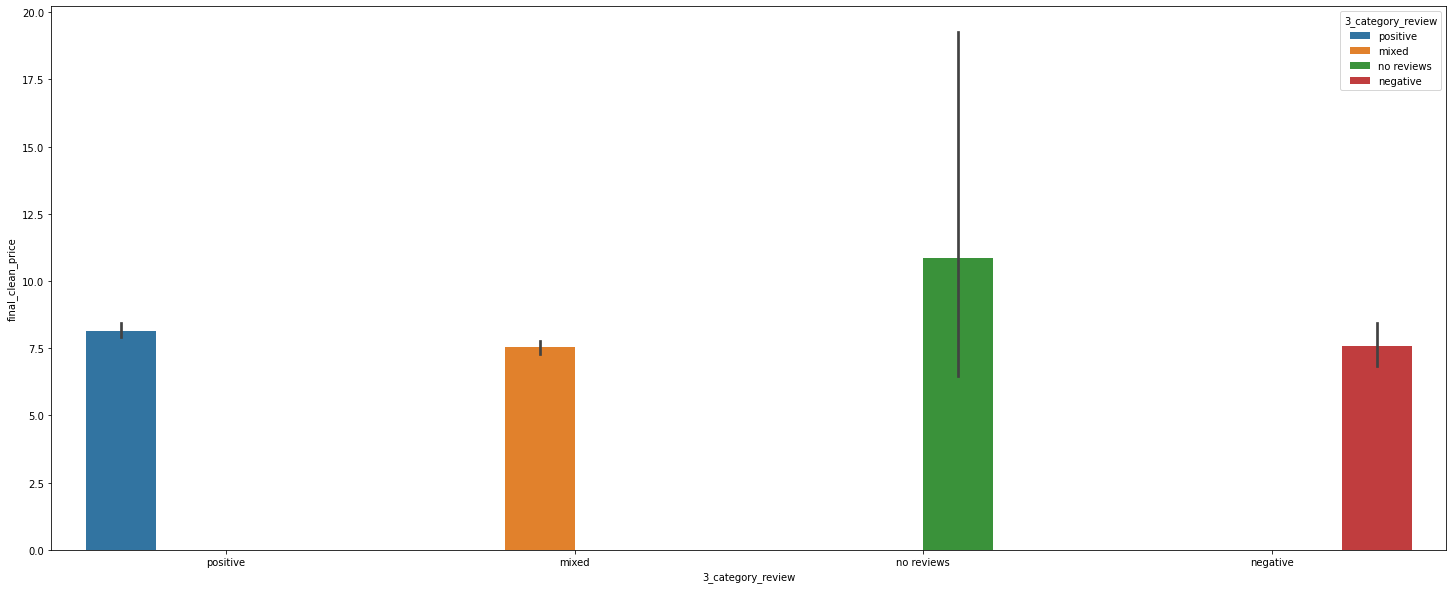

In [706]:
sns.barplot(y="final_clean_price", x="3_category_review", hue = '3_category_review', data=df)
